In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("C:\\Users\\absim\\Downloads\\housing.csv.zip")

In [36]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [38]:
df.dropna(inplace=True)

In [39]:
from sklearn.model_selection import train_test_split

X = df.drop(['median_house_value'], axis = 1)
y = df['median_house_value']

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

In [41]:
train_data = X_train.join(Y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

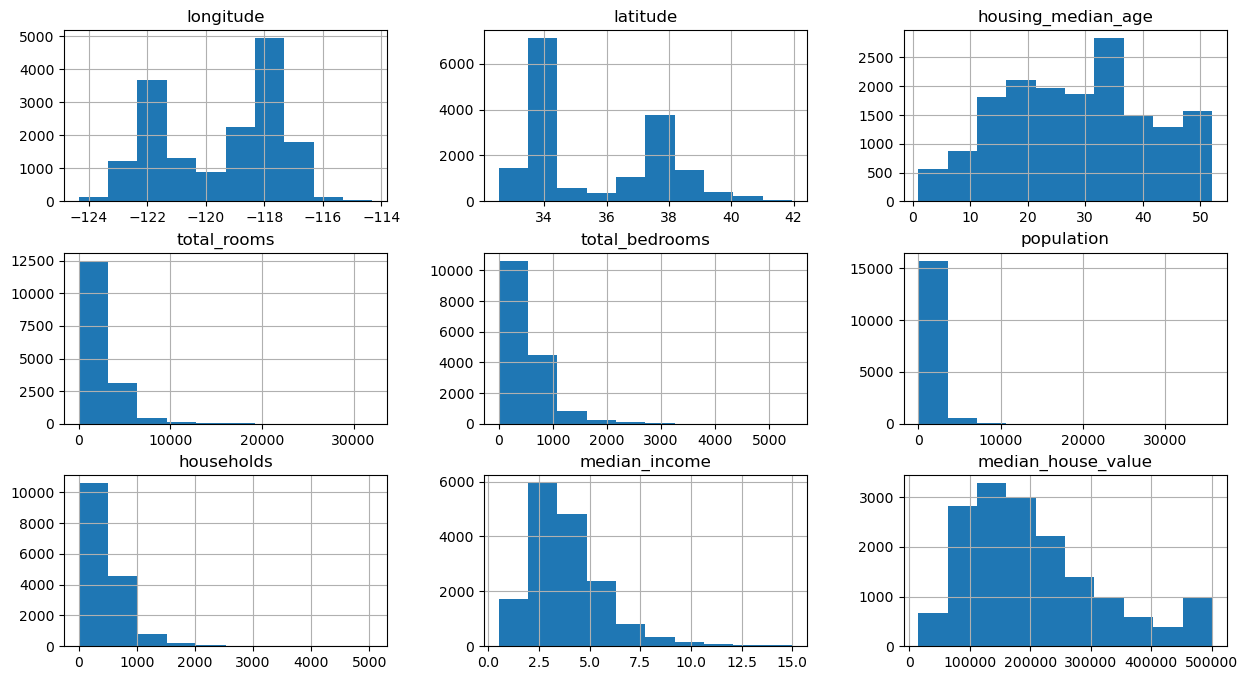

In [42]:
train_data.hist(figsize=(15,8))

<Axes: >

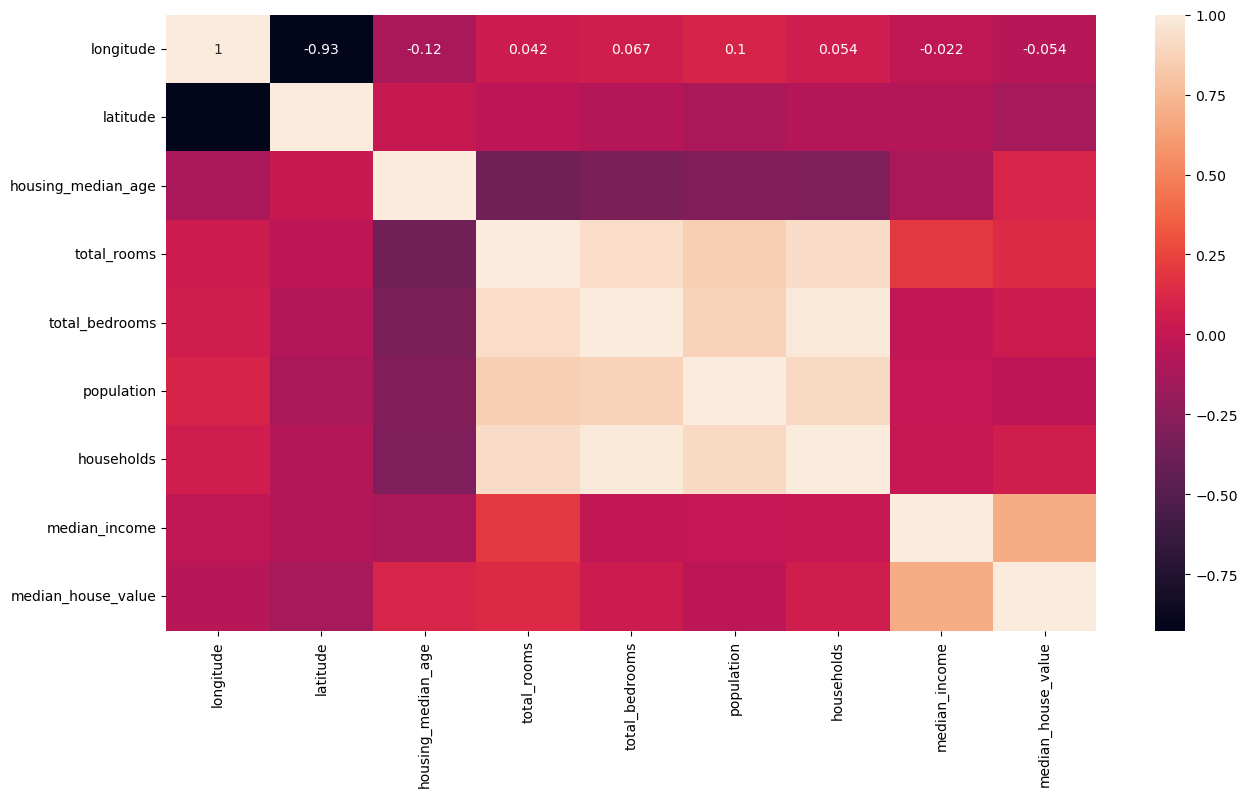

In [43]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(numeric_only = True), annot = True)

In [44]:
train_data['total rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'total rooms'}>,
        <Axes: title={'center': 'total bedrooms'}>, <Axes: >]],
      dtype=object)

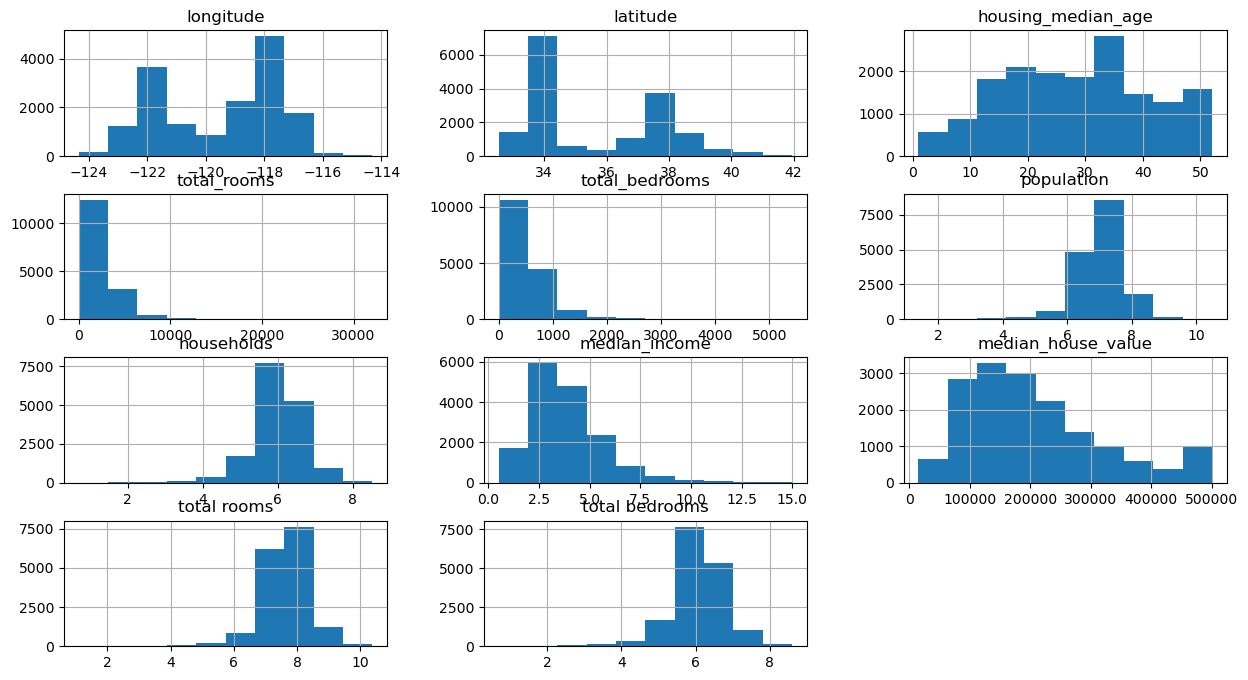

In [45]:
train_data.hist(figsize = (15,8))

In [46]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7222
INLAND        5151
NEAR OCEAN    2099
NEAR BAY      1871
ISLAND           3
Name: count, dtype: int64

In [47]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

<Axes: >

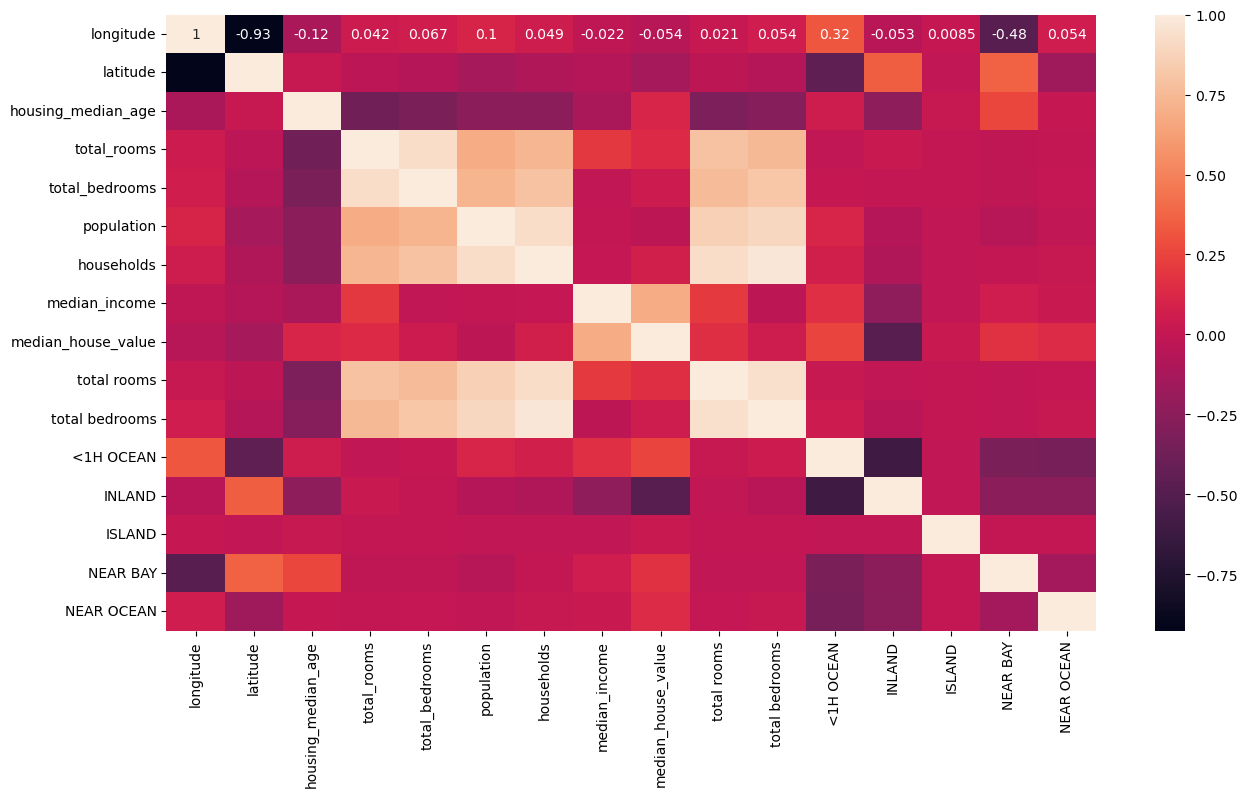

In [48]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(numeric_only = True), annot = True)

<Axes: xlabel='latitude', ylabel='longitude'>

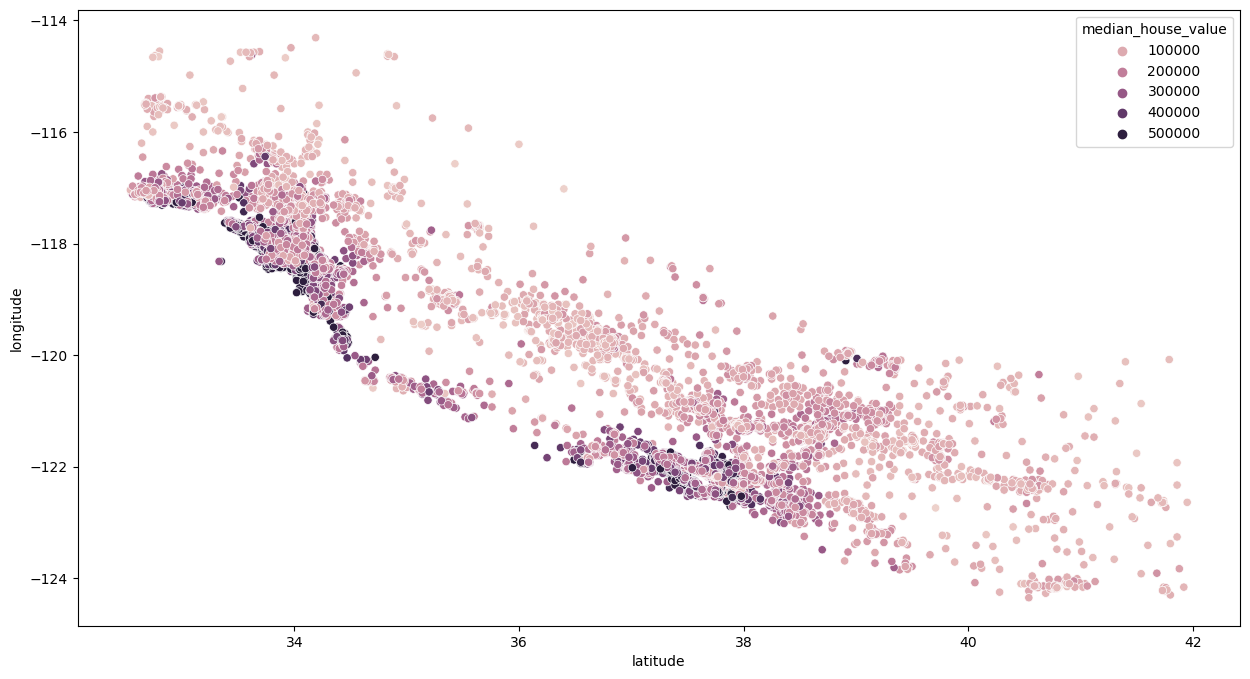

In [49]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "latitude", y = "longitude", data=train_data, hue = "median_house_value")

In [50]:
train_data['bedroom_ratio'] = train_data['total bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

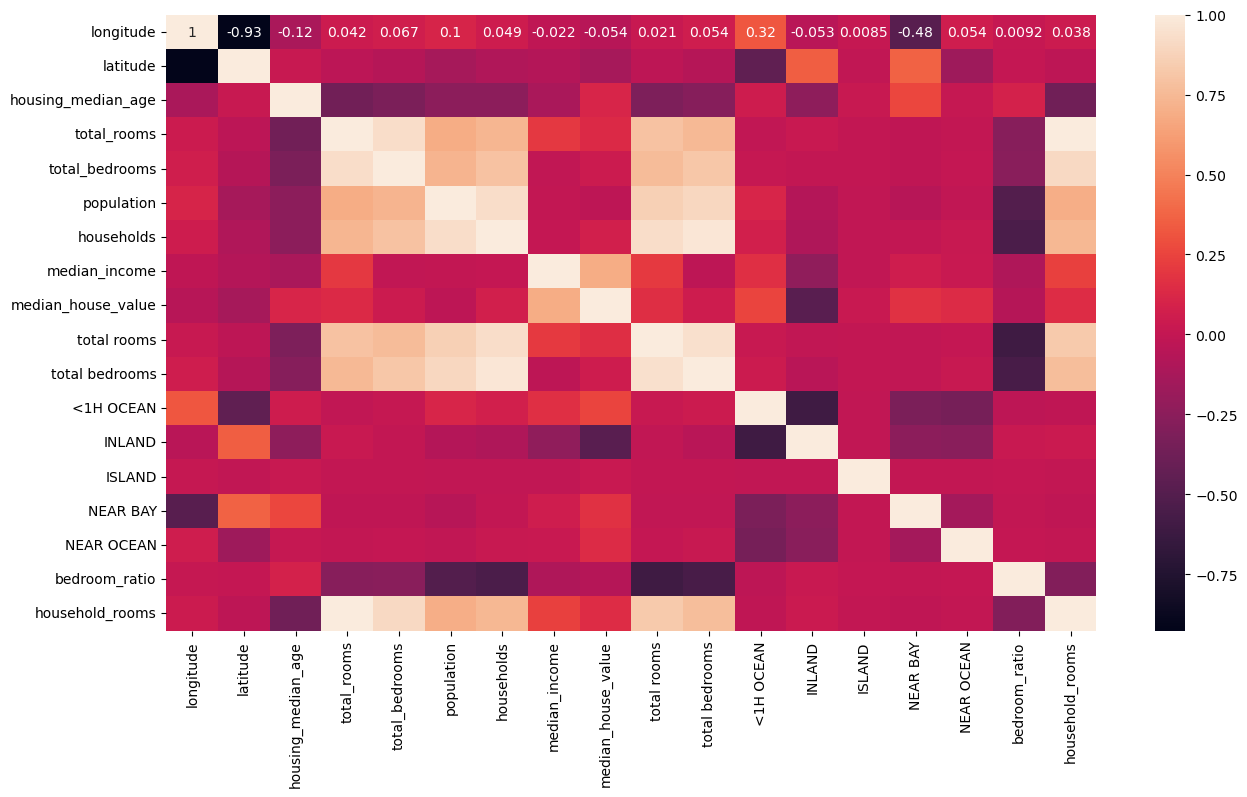

In [51]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(numeric_only = True), annot = True)